Q. diabetes.csv 데이터세트를 이용해 다음사항을 수행하여 당뇨병 여부를 판단하는 머신러닝 예측 모델을 작성하고 평가하세요.
- zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']는 0값을 평균값으로 대체
- 정확도, 정밀도, 재현율, F1 Score, ROC_AUC Score를 포함하는 평가지표 사용자 함수 작성
- 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태로 시각화
- 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 임계값 산출
- 산출된 임계값을 적용한 평가

※ 피처 정보  
'Pregnancies'(임신 횟수), 'Glucose'(포도당 부하 검사 수치), 'BloodPressure'(혈압),
'SkinThickness'(팔 삼두근 뒤쪽의 피하지방 측정값, 'Insulin'(혈청 인슈린),
'BMI'(체질량 지수), 'DiabetesPedigreeFunction'(당뇨 내력 가중치 값), 'Age', 'Outcome'

In [251]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/drive/MyDrive/kdt_240224/m5_머신러닝/dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [252]:
# zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']는 0값을 평균값으로 대체
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
df[zero_features] = df[zero_features].replace(0,df[zero_features].mean())

<Axes: >

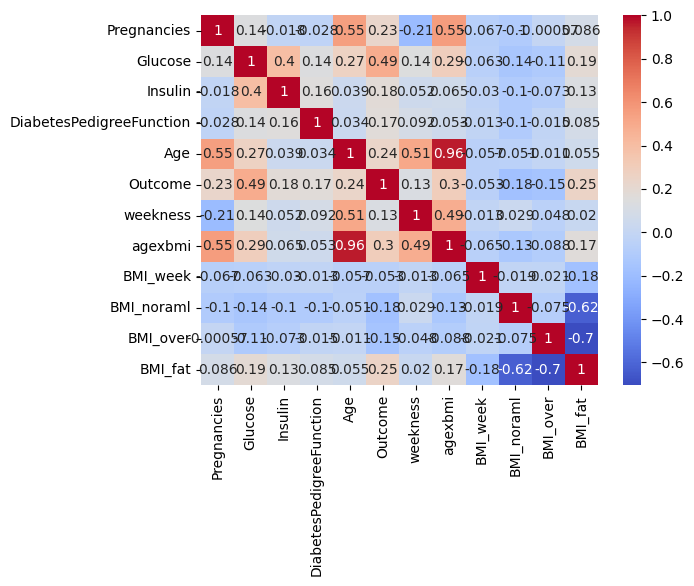

In [262]:
#df 파일을 coll hot 그래프로 표현
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [254]:
# BloodPressure	SkinThickness테이블 삭제
df = df.drop(['BloodPressure','SkinThickness'],axis=1)

In [255]:
df['Insulin'] = df['Insulin'].replace(0,1)
mmall = MinMaxScaler()
scall = StandardScaler()
nmall = Normalizer()
df[['Age']] = mmall.fit_transform(df[['Age']])

In [256]:
# df['insulin']==0 인 사람들에게 +1씩 더함

# df['bp_per_Insulin'] = df['BloodPressure']/df['Insulin']
# df['Pregnancies']가 0이면 1입력
df['Pregnancies'] = df['Pregnancies'].replace(0,1)
df['weekness'] = df['Age']/ df['Pregnancies']

In [258]:
df['agexbmi']=df['Age']*df['BMI']

In [259]:

df['BMI']=pd.cut(df['BMI'],bins=[0,18.5,23,25,100],labels=['week','noraml','over','fat'])

In [260]:
# bmi 더미생성
df = pd.get_dummies(df, columns=['BMI'])

In [261]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156, stratify=y)

X_train_scaled = nmall.fit_transform(X_train)
X_test_scaled = nmall.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)
y_pred = lr_clf.predict(X_test_scaled)
y_proba = lr_clf.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
confusion = confusion_matrix(y_test, y_pred)

print(f'오차 행렬:\n{confusion}')
print(f'정확도: {accuracy:.4f}')
print(f'정밀도: {precision:.4f}')
print(f'재현율: {recall:.4f}')
print(f'F1 스코어: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print('')

오차 행렬:
[[150   0]
 [ 81   0]]
정확도: 0.6494
정밀도: 0.0000
재현율: 0.0000
F1 스코어: 0.0000
ROC AUC: 0.6725



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [172]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156, stratify=y)

X_train_scaled = scall.fit_transform(X_train)
X_test_scaled = scall.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)
y_pred = lr_clf.predict(X_test_scaled)
y_proba = lr_clf.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
confusion = confusion_matrix(y_test, y_pred)

print(f'오차 행렬:\n{confusion}')
print(f'정확도: {accuracy:.4f}')
print(f'정밀도: {precision:.4f}')
print(f'재현율: {recall:.4f}')
print(f'F1 스코어: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print('')

오차 행렬:
[[130  20]
 [ 30  51]]
정확도: 0.7835
정밀도: 0.7183
재현율: 0.6296
F1 스코어: 0.6711
ROC AUC: 0.8380



In [173]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156, stratify=y)

X_train_scaled = mmall.fit_transform(X_train)
X_test_scaled = mmall.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)
y_pred = lr_clf.predict(X_test_scaled)
y_proba = lr_clf.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
confusion = confusion_matrix(y_test, y_pred)

print(f'오차 행렬:\n{confusion}')
print(f'정확도: {accuracy:.4f}')
print(f'정밀도: {precision:.4f}')
print(f'재현율: {recall:.4f}')
print(f'F1 스코어: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print('')

오차 행렬:
[[132  18]
 [ 35  46]]
정확도: 0.7706
정밀도: 0.7188
재현율: 0.5679
F1 스코어: 0.6345
ROC AUC: 0.8318



In [153]:
df[['Age']]

,Age
0,0.483333
1,0.166667
2,0.183333
3,0.000000
4,0.200000
...,...
763,0.700000
764,0.100000
765,0.150000
766,0.433333


In [154]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome,weekness,agexbmi,BMI_week,BMI_noraml,BMI_over,BMI_fat
Pregnancies,1.000000,0.138455,0.143336,-0.080594,-0.075680,-0.028443,0.548175,0.231621,-0.210713,0.548580,-0.067235,-0.104494,-0.000566,0.080244
Glucose,0.138455,1.000000,0.152590,0.057328,0.332132,0.137337,0.263514,0.466581,0.146644,0.284440,-0.058074,-0.126253,-0.112470,0.197343
BloodPressure,0.143336,0.152590,1.000000,0.207371,0.088836,0.041265,0.239528,0.065068,0.072262,0.273317,0.001476,-0.058138,-0.082856,0.180051
SkinThickness,-0.080594,0.057328,0.207371,1.000000,0.435662,0.183928,-0.113970,0.074752,-0.048466,-0.026382,-0.054632,-0.183811,-0.163187,0.291517
Insulin,-0.075680,0.332132,0.088836,0.435662,1.000000,0.184890,-0.041364,0.131109,0.009531,-0.003583,-0.037200,-0.097048,-0.081469,0.155213
DiabetesPedigreeFunction,-0.028443,0.137337,0.041265,0.183928,0.184890,1.000000,0.033561,0.173844,0.091581,0.054801,-0.012866,-0.103258,-0.014632,0.085938
Age,0.548175,0.263514,0.239528,-0.113970,-0.041364,0.033561,1.000000,0.238356,0.509527,0.944362,-0.056894,-0.051062,-0.011334,0.062420
Outcome,0.231621,0.466581,0.065068,0.074752,0.131109,0.173844,0.238356,1.000000,0.125836,0.297243,-0.052974,-0.177747,-0.152053,0.252671
weekness,-0.210713,0.146644,0.072262,-0.048466,0.009531,0.091581,0.509527,0.125836,1.000000,0.483426,-0.013153,0.028610,-0.048413,0.033793
agexbmi,0.548580,0.284440,0.273317,-0.026382,-0.003583,0.054801,0.944362,0.297243,0.483426,1.000000,-0.064560,-0.125030,-0.085141,0.197965


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [246]:
df.isnull().sum()

Pregnancies                  0
Glucose                      0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
agexbmi                      0
weekness                     0
dtype: int64

In [263]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/drive/MyDrive/kdt_240224/m5_머신러닝/dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
